In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

In [3]:
# Step 2: Load the Dataset
df = pd.read_csv('50_Startups.csv')


In [5]:
# Step 3: Explore the Data
# Display the first few rows of the dataset
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [6]:
# Check basic statistics
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [7]:

# Check data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [8]:
# Step 4: Data Cleaning
# Check for missing values
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("\nStep 5: Data Transformation")
print("Original Columns:")
print(df.columns)


Step 5: Data Transformation
Original Columns:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')


In [17]:
# Step 5: Data Transformation
print("\nStep 5: Data Transformation")
print("Original Columns:")
print(df.columns)


Step 5: Data Transformation
Original Columns:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')


In [10]:
# Encode the 'State' column (categorical variable) using one-hot encoding
df = pd.get_dummies(df, columns=['State'])


In [11]:
# Step 6: Feature Selection
# Depending on your analysis, you might choose specific columns as features
selected_features = df[['R&D Spend', 'Administration', 'Marketing Spend']]


In [12]:
# Step 7: Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, df['Profit'], test_size=0.2, random_state=42)


In [13]:
# Step 8: Data Normalization or Scaling (if needed)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


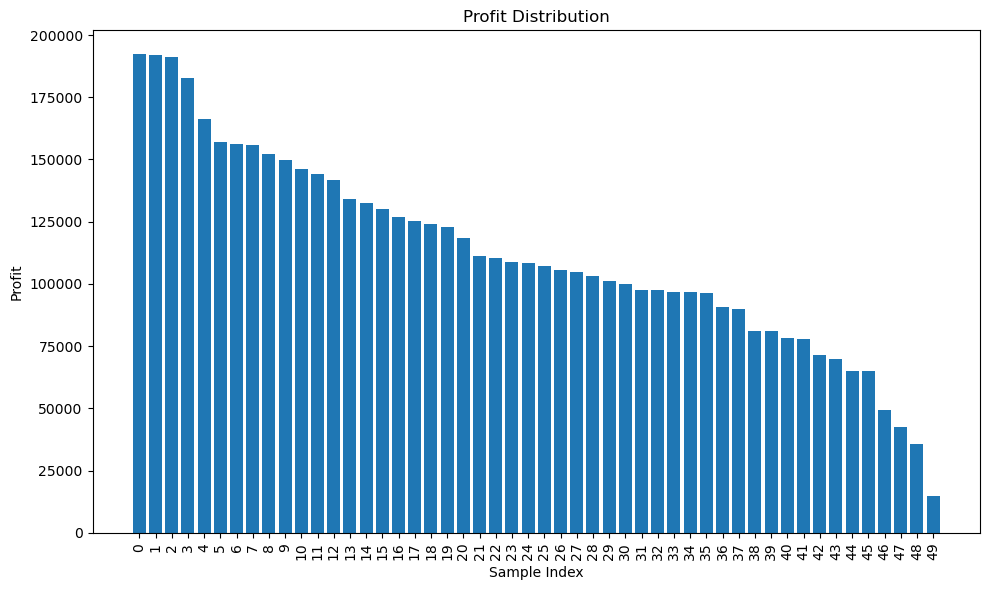

In [18]:
# Step 9: Data Visualization
import matplotlib.pyplot as plt


# Load the preprocessed data (replace 'preprocessed_dataset.csv' with your actual file path)
preprocessed_data = pd.read_csv('50_Startups.csv')

# Extract data for plotting (e.g., 'Profit' column)
profit = preprocessed_data['Profit']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(profit)), profit, tick_label=preprocessed_data.index)
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.title('Profit Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()
plt.show()

In [20]:
#STEP_10
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy (e.g., R-squared and Mean Squared Error)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R-squared: 0.90
Mean Squared Error: 80926321.22
